# The raw data files and their format

Given raw data files is in CSV with vertical bar separator

In [1]:
#import required libraries
import pandas as pd
import os
os.chdir('D:\DA\Technolab Intern\Task 1 Mini Project')

# Read in and get an overview of the data

In [2]:
#reading files
miles_drivenby_state = pd.read_csv('miles-driven.csv', sep = '|')
miles_drivenby_state.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [3]:
#reading file 1
miles_drivenby_state = pd.read_csv('miles-driven.csv', sep = '|')
miles_drivenby_state.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [4]:
#checking rows and columns of file 1
miles_drivenby_state.shape

(51, 2)

In [5]:
#summery of dataframe
miles_drivenby_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [6]:
#reading file 2
#skipping 9 rows from the raw file
road_accident = pd.read_csv('road-accidents.csv', sep = '|', skiprows = 9)
road_accident.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [7]:
#file 2 rows and columns
road_accident.shape

(51, 5)

In [8]:
#file 2summary
road_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [9]:
miles_drivenby_state.groupby(['state'])

<Figure size 3000x3000 with 0 Axes>

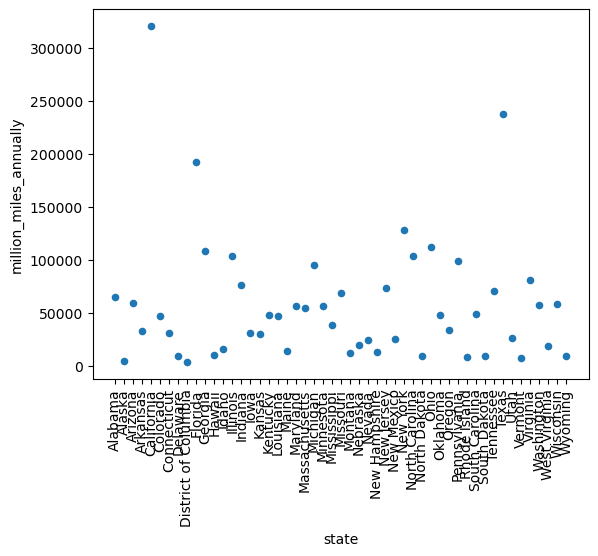

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
miles_drivenby_state.plot.scatter(x = 'state', y = 'million_miles_annually', s = 20)
plt.xticks(rotation=90)
plt.show()

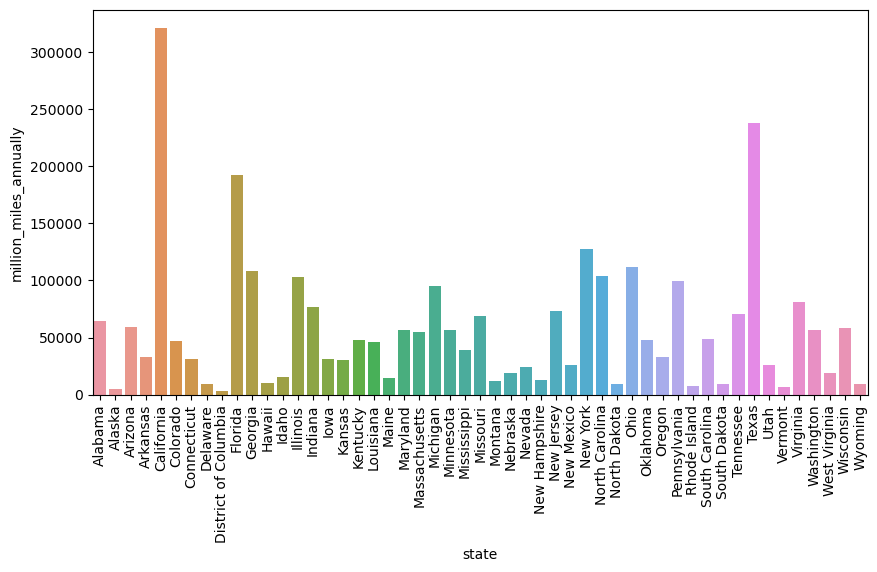

In [11]:
import seaborn as sns
#sns.histplot(data=miles_drivenby_state, x='state')
fig, ax = plt.subplots(figsize=(10, 5))
#sns.barplot(x=miles_drivenby_state['state'], y=miles_drivenby_state['million_miles_annually'], ax=ax, width =0.8)
sns.barplot(data = miles_drivenby_state, x='state', y='million_miles_annually')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

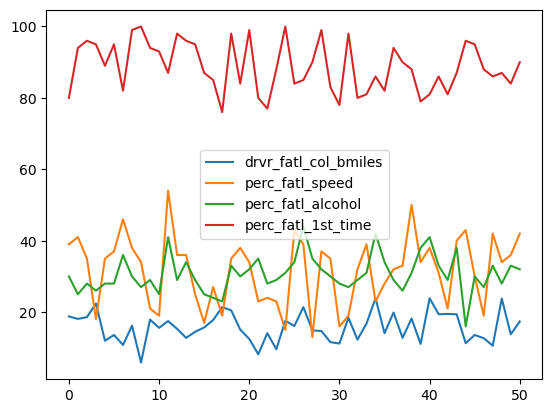

In [12]:
road_accident.plot()

<AxesSubplot:>

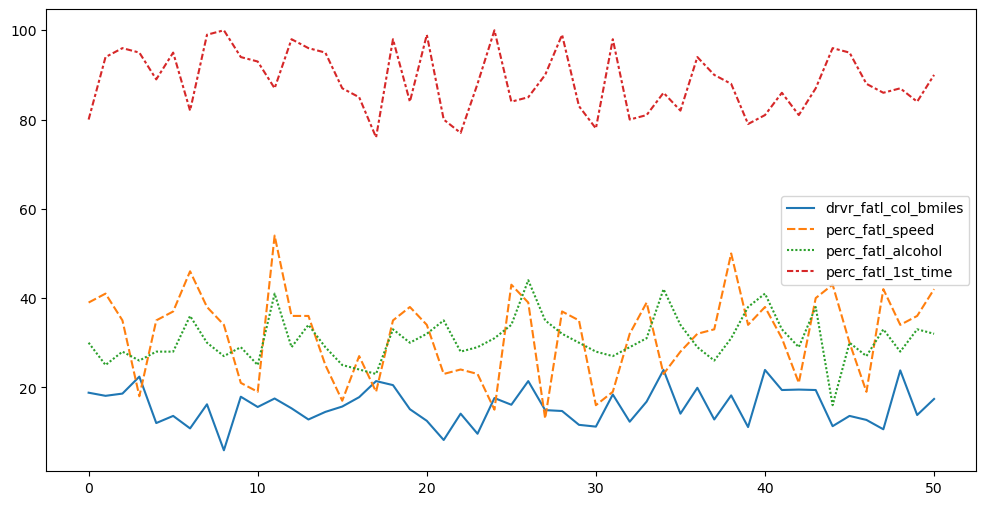

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(data=road_accident)

<AxesSubplot:>

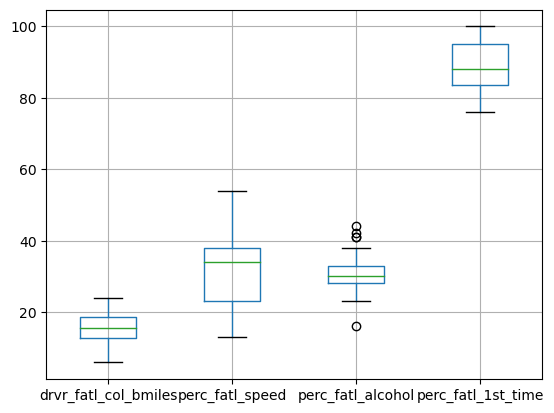

In [14]:
road_accident.boxplot()

<AxesSubplot:>

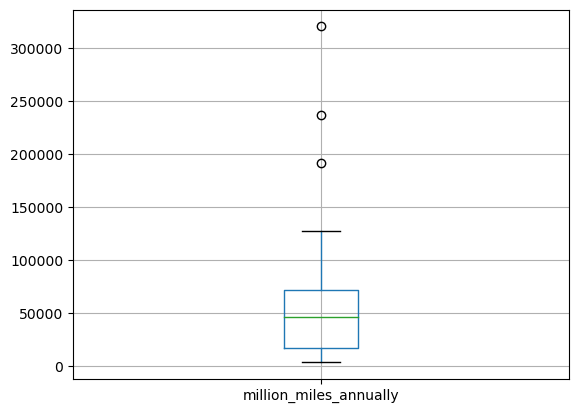

In [15]:
miles_drivenby_state.boxplot()

In [16]:
road_accident.corr()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [17]:
from scipy.stats import pearsonr
pearson_correlation = road_accident.corr(method='pearson')
pearson_correlation

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


### Multivariate linear regression

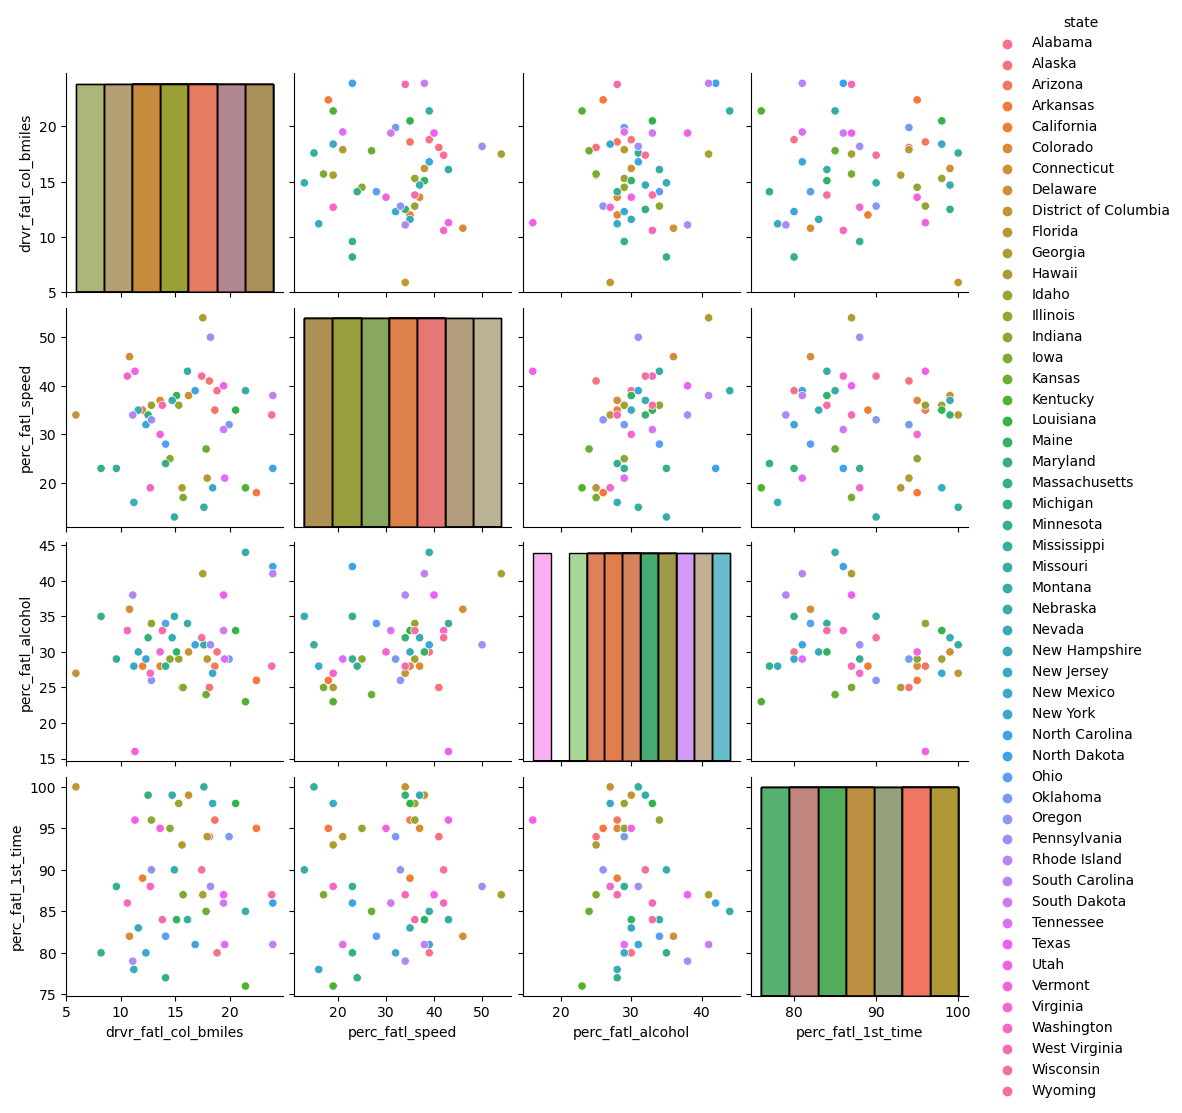

In [18]:
sns.pairplot(road_accident, hue="state", diag_kind="hist")

In [19]:
miles_drivenby_state.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [23]:
road_accident.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [24]:
road_accident_new = road_accident.join(miles_drivenby_state['million_miles_annually'])
road_accident_new.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
0,Alabama,18.8,39,30,80,64914
1,Alaska,18.1,41,25,94,4593
2,Arizona,18.6,35,28,96,59575
3,Arkansas,22.4,18,26,95,32953
4,California,12.0,35,28,89,320784


In [25]:
road_accident_new.corr()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942,-0.077133
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066,-0.043199
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455,-0.034561
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000,-0.128928
million_miles_annually,-0.077133,-0.043199,-0.034561,-0.128928,1.000000


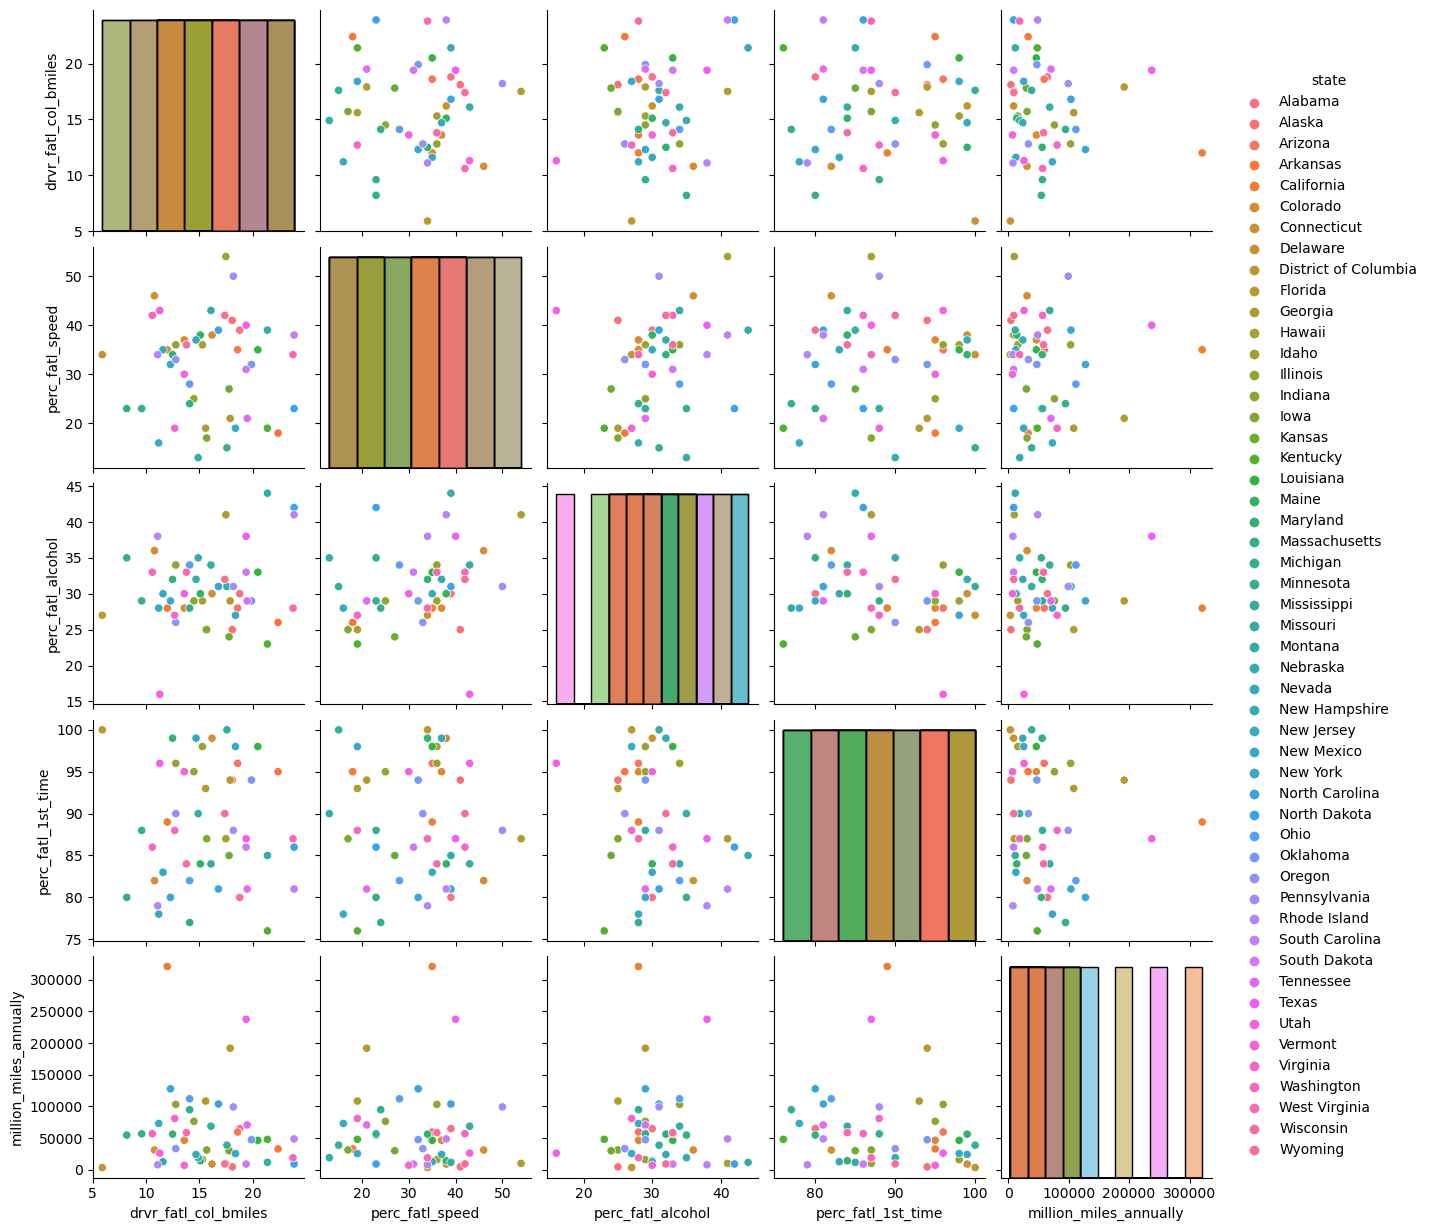

In [26]:
sns.pairplot(road_accident_new, hue="state", diag_kind="hist")

array([[<AxesSubplot:title={'center':'drvr_fatl_col_bmiles'}>,
        <AxesSubplot:title={'center':'perc_fatl_speed'}>],
       [<AxesSubplot:title={'center':'perc_fatl_alcohol'}>,
        <AxesSubplot:title={'center':'perc_fatl_1st_time'}>]],
      dtype=object)

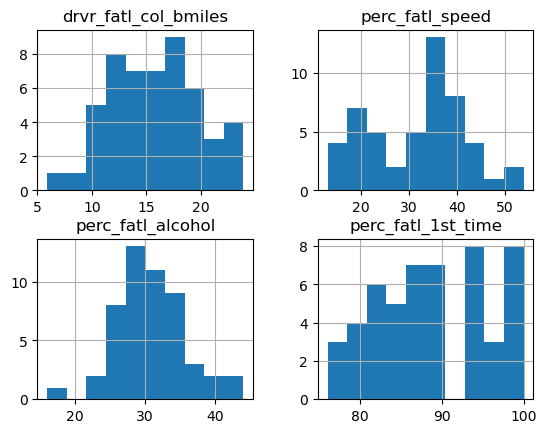

In [31]:
road_accident.hist()